# Import the Libraries

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Read the Labelled dataset

import pandas as pd
data = pd.read_excel('/content/drive/My Drive/Labelled_Total_Data.xlsx')
data = data[['Tweet','Label']]
print(data)

                                                  Tweet  Label
0      people professing nationalism, patriotism and...   -1.0
1      this is some kind of serious conspiracy plz d...    1.0
2                              support with caa and nrc    1.0
3      i understand your emotion, but feel that firi...    0.0
4      rt most of the muslim who led the riot were b...    1.0
...                                                 ...    ...
4057   can anyone tell the name of the journalist an...    0.0
4058   none can enter india without a visa issued by...    1.0
4059   rt right or left, wing are meant to keep u af...    0.0
4060   right or left, wing are meant to keep u afloa...    0.0
4061   we have lost some wonderful writers, actors, ...    0.0

[4062 rows x 2 columns]


In [0]:
data.isnull().any()
data.fillna(0, inplace=True)

# Encode the Words

In [4]:
# Convert the text data into sequence using text_to_sequence method

def text2seq(data):
    max_fatures = 2000
    tokenizer = Tokenizer(num_words = max_fatures, split=' ')
    tokenizer.fit_on_texts(data['Tweet'].values)
    X = tokenizer.texts_to_sequences(data['Tweet'].values)
    X = pad_sequences(X)
    return X

X = text2seq(data)
print("Dimension of the input data after text_to_sequence method: ", X.shape)

Dimension of the input data after text_to_sequence method:  (4062, 72)


In [5]:
data

,Tweet,Label
0,"people professing nationalism, patriotism and...",-1.0
1,this is some kind of serious conspiracy plz d...,1.0
2,support with caa and nrc,1.0
3,"i understand your emotion, but feel that firi...",0.0
4,rt most of the muslim who led the riot were b...,1.0
...,...,...
4057,can anyone tell the name of the journalist an...,0.0
4058,none can enter india without a visa issued by...,1.0
4059,"rt right or left, wing are meant to keep u af...",0.0
4060,"right or left, wing are meant to keep u afloa...",0.0


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
def Tf_idf(data):
    tweet_data = data['Tweet']
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(tweet_data)
    print(vectorizer.get_feature_names())
    return X

X = Tf_idf(data)
print("Dimension of input data after tf-idf vectorization:", X.shape)

['000', '02', '10', '100', '1000', '100th', '1020', '10th', '10years', '10yrs', '11', '11000', '115', '115cr', '12', '1255', '12monkeys', '12percentreservation', '12th', '13', '133', '139', '14', '1400', '144', '14a', '15', '150', '15cr', '15crore', '15th', '16', '16long', '16yrs', '17', '18', '180', '1881', '19', '1930s', '1931', '193345', '1941', '1946', '194647', '1947', '1948', '1955', '1960', '1970', '1970s', '1971', '1980', '1984', '1985', '1986', '19a', '19b', '19lakh', '1billion', '1first', '1months', '1n', '1oppose', '1st', '1wrong', '20', '200', '2000', '2002', '2003', '2009', '2010', '2012', '2013', '2014', '2014amp', '2014the', '2015', '2016', '2017ðÿ', '2018', '2019', '2019ncov', '201dayskashmirlockdown', '2020', '2020census', '2021', '2021it', '2022', '2023', '2024', '22', '227', '22nd', '23', '23rd', '23ã', '24', '247', '24x7', '25', '26', '2602', '2611', '270', '2753', '27th', '28', '28th', '29', '2anticonversion', '2do', '2months', '2n', '2nd', '2oppose', '2take', '2th

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def count_vectorizer(data):
    tweet_data = data['Tweet']
    bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

    # bag-of-words feature matrix
    bow = bow_vectorizer.fit_transform(tweet_data)

    df_bow = pd.DataFrame(bow.todense())

    return df_bow
X = count_vectorizer(data)

# Split the data into training and testing set

In [7]:
from sklearn.model_selection import train_test_split
# Y = pd.get_dummies(data['Label']).values

def split_train_test(X, Y):
    Y=data["Label"].values
    print(Y)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20)
    print("Dimension of training features and label: ", X_train.shape,Y_train.shape)
    print("Dimension of testing features and label: ", X_test.shape,Y_test.shape)

    return X_train, X_test, Y_train, Y_test

Y = data['Label']
X_train, X_test, Y_train, Y_test = split_train_test(X, Y)

[-1.  1.  1. ...  0.  0.  0.]
Dimension of training features and label:  (3249, 9058) (3249,)
Dimension of testing features and label:  (813, 9058) (813,)


In [13]:
import numpy as np
print(np.array(X_train[10]))
# print(X_test)
# print(Y_train)
# print(Y_test)

  (0, 8770)	0.27250960911228206
  (0, 7755)	0.3146023208716008
  (0, 2092)	0.2584204410443196
  (0, 2722)	0.24814205732368488
  (0, 5573)	0.2365603357815669
  (0, 256)	0.23826348005583695
  (0, 6415)	0.25293761272898674
  (0, 3816)	0.2333656163456914
  (0, 4215)	0.17556782799277124
  (0, 4688)	0.2872812887735657
  (0, 1467)	0.20917879337048917
  (0, 3078)	0.18181459958429397
  (0, 1984)	0.24595206485482068
  (0, 7950)	0.15647348884088821
  (0, 1669)	0.1471893846625545
  (0, 7369)	0.13181622347986488
  (0, 4008)	0.1034099328655409
  (0, 5614)	0.09505677145011004
  (0, 8053)	0.20010932118723979
  (0, 4322)	0.08940018121610059
  (0, 4276)	0.14416525097485236
  (0, 8104)	0.10853348050163011
  (0, 8171)	0.06268198918702585
  (0, 5636)	0.11486446441014704
  (0, 1412)	0.10118501820136099
  (0, 5773)	0.13592527563885906
  (0, 562)	0.08301749366556081


# Train the Machine Learning Models

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def Logistic_regression_model(X_train, X_test, Y_train, Y_test):

    logreg = LogisticRegression(C=100, max_iter=500)
    logreg.fit(X_train, Y_train)
    y_pred = logreg.predict(X_test)

    print("accuracy score on the logistic regression model:", accuracy_score(y_pred, Y_test))
    return y_pred
y_pred = Logistic_regression_model(X_train, X_test, Y_train, Y_test)

accuracy score on the logistic regression model: 0.6186961869618696


In [15]:
from sklearn.linear_model import SGDClassifier
def SGD_model(X_train, X_test, Y_train, Y_test):
    sgd= SGDClassifier(loss='hinge', penalty='l2',alpha=0.01, random_state=42, max_iter=100, tol=None)
    sgd.fit(X_train, Y_train)
    y_pred = sgd.predict(X_test)

    print('accuracy %s' % accuracy_score(y_pred, Y_test))

SGD_model(X_train, X_test, Y_train, Y_test)

accuracy 0.5399753997539976


In [16]:
from sklearn import svm
from sklearn.metrics import accuracy_score
def SVM(X_train, X_test, Y_train, Y_test):
    
    classifier = svm.SVC()
    classifier.fit(X_train, Y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)

    print("Accuracy of SVM model: ", accuracy)

SVM(X_train, X_test, Y_train, Y_test)

Accuracy of SVM model:  0.6113161131611317


In [17]:
from sklearn.ensemble import RandomForestClassifier
def build_model_randomForest(X_train, X_test, Y_train, Y_test):
    
    clf=RandomForestClassifier(n_estimators=10)
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)
    
    print("Accuracy of random forest algorithm: ", accuracy)

build_model_randomForest(X_train, X_test, Y_train, Y_test)

Accuracy of random forest algorithm:  0.5854858548585485


In [18]:
from sklearn.naive_bayes import MultinomialNB
import numpy as np
def model_naiveBayes(X_train, X_test, Y_train, Y_test):

    gnb = MultinomialNB()
    gnb.fit(X_train, Y_train)
    y_pred = gnb.predict(X_test)
    accuracy = accuracy_score(Y_test,y_pred)

    print("Accuracy of Naive Bayes Model: ", accuracy)

model_naiveBayes(X_train, X_test, Y_train, Y_test)

Accuracy of Naive Bayes Model:  0.5731857318573186


# RNN

In [0]:
X_train_mat=X_train.toarray()
X_train_NN=X_train_mat.reshape(X_train_mat.shape[0],X_train_mat.shape[1],1)
Y_train_NN = pd.get_dummies(Y_train).values

In [63]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout,Flatten

regressor=Sequential()
#first RNN layer
regressor.add(SimpleRNN(128,activation="relu",return_sequences=True,input_shape=(X_train_NN.shape[1],X_train_NN.shape[2])))
regressor.add(Dropout(0.25))
regressor.add(Flatten())
regressor.add(Dense(3))

regressor.compile(optimizer="adam",loss="mean_squared_error",metrics = ['accuracy'])
regressor_history =regressor.fit(X_train_NN,Y_train_NN,epochs=3,batch_size=64)


Epoch 1/3
3249/3249 [==============================] - 341s 105ms/step - loss: 0.2012 - accuracy: 0.5432
Epoch 2/3
3249/3249 [==============================] - 354s 109ms/step - loss: 0.1125 - accuracy: 0.7892
Epoch 3/3
3249/3249 [==============================] - 350s 108ms/step - loss: 0.0766 - accuracy: 0.8596


In [0]:
import numpy as np
loss_fn=str(np.mean(regressor_history.history['loss']))

In [0]:
X_test_mat=X_test.toarray()
X_test_NN=X_test_mat.reshape(X_test_mat.shape[0],X_test_mat.shape[1],1)
Y_test_NN = pd.get_dummies(Y_test).values

In [0]:
predicted_data=regressor.predict(X_test_NN)

In [0]:
y_pred=[]
for p in predicted_data:
    p=list(p)
    i=p.index(max(p))
    if(i==0):
      y_pred.append(-1)
    if(i==1):  
      y_pred.append(0)
    if(i==2):
      y_pred.append(1)  

In [69]:
from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,y_pred))

0.6162361623616236


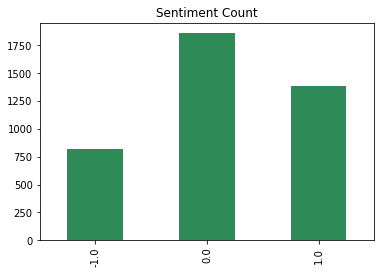

In [0]:
import matplotlib.pyplot as plt
data['Label'].value_counts().sort_index().plot(kind='bar', title='Sentiment Count', color='seagreen')